# Catalog Tools: How To

<div class="alert alert-block alert-info">
    
#### In this notebook we will show how to:

<ol>
    <li>Download catalogs</li>
    <li>Plot the seismicity</li>
    <li>Generate synthetic earthquakes</li>
    <li>Bin magnitudes</li>
    <li>Calculate b-values</li> 
</ol>

## 0. Import general packages
<font color=#208de2> In the main package, the analytic tools are available (b-value estimation), while other funcitons as catalog downloads, general functions and plotting are defined as subpackages. </font>

In [1]:
#%matplotlib widget
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## 1. Download catalog

In [ ]:
from catalog_tools.plots.basics import d

In [7]:
# standard
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# for map plotting
from shapely.geometry import Polygon
import cartopy
from cartopy.io import shapereader
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopandas

# typing
from typing import Optional
from typing import List


def plot_in_space(
        cat: pd.DataFrame,
        country: Optional[str] = None,
        resolution: str = '110m',
        colors: Optional[str] = None
) -> cartopy.mpl.geoaxes.GeoAxes:
    """
    function plots
    Args:
        cat: pd.DataFrame
        country: name of country, if None map will fit to data points
        resolution: resolution of map, '10m', '50m' and '110m' available

    Returns:
        GeoAxis object
    """
    # request data for use by geopandas
    category: str = 'cultural'
    name: str = 'admin_0_countries'
    print("checkpoint 1")
    shpfilename = shapereader.natural_earth(resolution, category, name)
    print("checkpoint 2")
    df = geopandas.read_file(shpfilename)

    print("checkpoint 3")
    if colors is not None:
        stamen_terrain = cimgt.Stamen('terrain-background',
                                      desired_tile_form="L")
    else:
        stamen_terrain = cimgt.Stamen('terrain-background')

    # projections that involved
    print("checkpoint 4")
    st_proj = stamen_terrain.crs  # projection used by Stamen images
    ll_proj = ccrs.PlateCarree()  # CRS for raw long/lat

    ax = plt.subplot(projection=st_proj)
    print("checkpoint 5")

    if country is not None:
        print("checkpoint 6")
        # create box around country
        poly = [df.loc[df['ADMIN'] == country]['geometry'].values[0]]
        pad_lat = abs(poly[0].bounds[0] - poly[0].bounds[2]) * 0.05
        pad_lon = abs(poly[0].bounds[1] - poly[0].bounds[3]) * 0.05
        exts = [poly[0].bounds[0] - pad_lat, poly[0].bounds[2] + pad_lat,
                poly[0].bounds[1] - pad_lon, poly[0].bounds[3] + pad_lon]
        msk = Polygon(rect_from_bound(*exts)).difference(poly[0].simplify(0.01))
#         msk_stm = st_proj.project_geometry(msk, ll_proj)
        ax.add_geometries(msk, st_proj, facecolor='white', edgecolor='grey',
                          alpha=0.6)
    else:
        # create box around the data points
        pad_lat = abs(max(cat['latitude']) - min(cat['latitude'])) * 0.05
        pad_lon = abs(max(cat['longitude']) - min(cat['longitude'])) * 0.05
        exts = [min(cat['latitude']) - pad_lat,
                max(cat['latitude']) + pad_lat,
                min(cat['longitude']) - pad_lon,
                max(cat['longitude']) + pad_lon]

#     ax.set_extent(exts, crs=ll_proj)
    ax.add_image(stamen_terrain, 8, alpha=0.6)

#     # gridlines
#     gl = ax.gridlines(crs=ll_proj, draw_labels=True,
#                       linewidth=1, color='gray', alpha=0.5, linestyle='--')
#     gl.xformatter = LONGITUDE_FORMATTER
#     gl.yformatter = LATITUDE_FORMATTER
#     gl.bottom_labels = False
#     gl.right_labels = False
    print("checkpoint x")
    ax.scatter(
        cat["longitude"],
        cat["latitude"],
        c='blue',
        edgecolor='k',
        s=np.array(cat["magnitude"]),
        zorder=100,
        transform=ccrs.PlateCarree(),
        linewidth=0.5, alpha=0.8,
    )
    #return ax, msk


def rect_from_bound(xmin: float, xmax: float, ymin: float, ymax: float
                    ) -> List[tuple]:
    """
    Makes list of tuples for creating a rectangle polygon
    Args:
        xmin: minimum x value
        xmax: maximum x value
        ymin: minimum y value
        ymax: maximum y value

    Returns:
        list of (x,y)'s for a rectangle
    """
    xs = [xmax, xmin, xmin, xmax, xmax]
    ys = [ymax, ymax, ymin, ymin, ymax]
    return [(x, y) for x, y in zip(xs, ys)]


In [3]:
from catalog_tools import download_catalog_sed, prepare_sed_catalog

<font color=#208de2> Swiss Catalog. Start date and end date have to be defined as a datetime. </font>

In [4]:
start_time = pd.to_datetime('2022/01/01')
end_time = dt.datetime.now()
min_magnitude = 0.5

df = download_catalog_sed(start_time=start_time, end_time=end_time, min_magnitude=min_magnitude)
df = prepare_sed_catalog(df, convert_to_mw=False)

In [5]:
start=dt.datetime(1980,1,1)
cat = pd.read_csv("../etas/input_data/df_for_etas_since_1700_newregion.csv", parse_dates=["time"]).query("magnitude>=mc_current and time >=@start")

<font color=#208de2> The output is a dataframe: </font>

In [5]:
df.tail()

,#EventID,time,latitude,longitude,depth,Author,Catalog,Contributor,ContributorID,mag_type,magnitude,MagAuthor,EventLocationName,event_type
4,smi:ch.ethz.sed/sc20a/Event/2023fhnwve,2023-03-16 22:11:50.849760,46.722447,7.056512,2.2,jclinton@sc20ag,NaN,SED,smi:ch.ethz.sed/sc20a/Event/2023fhnwve,MLhc,3.0,jclinton@sc20ag,Villaz FR,earthquake
3,smi:ch.ethz.sed/sc20a/Event/2023fhpwwn,2023-03-16 23:12:13.805116,46.720349,7.056876,3.1,jclinton@sc20ag,NaN,SED,smi:ch.ethz.sed/sc20a/Event/2023fhpwwn,MLhc,0.9,jclinton@sc20ag,Villaz FR,earthquake
2,smi:ch.ethz.sed/sc20a/Event/2023fhrwvg,2023-03-17 00:12:32.653728,46.722702,7.057068,5.5,jclinton@sc20ag,NaN,SED,smi:ch.ethz.sed/sc20a/Event/2023fhrwvg,MLhc,0.8,jclinton@sc20ag,Villaz FR,earthquake
1,smi:ch.ethz.sed/sc20a/Event/2023fhxzzv,2023-03-17 03:17:14.862582,46.720963,7.051497,5.5,jclinton@sc20ag,NaN,SED,smi:ch.ethz.sed/sc20a/Event/2023fhxzzv,MLhc,1.3,jclinton@sc20ag,Villaz FR,earthquake
0,smi:ch.ethz.sed/sc20a/Event/2023fhyzmx,2023-03-17 03:47:02.729308,46.126859,8.052103,6.9,jclinton@sc20ag,NaN,SED,smi:ch.ethz.sed/sc20a/Event/2023fhyzmx,MLhc,1.4,jclinton@sc20ag,Simplon Dorf VS,earthquake


## 2. Seismicity Plots
<font color=#208de2> We plot the seismicity in time and space, and the cumulative frequency-magnitude distribution </font>

In [6]:
from catalog_tools import plot_cum_fmd, plot_fmd, plot_cum_count, plot_mags_in_time, plot_in_space

checkpoint 1
checkpoint 2
checkpoint 3
checkpoint 4
checkpoint 5
checkpoint x


/cluster/home/marhan/venv/lib64/python3.8/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


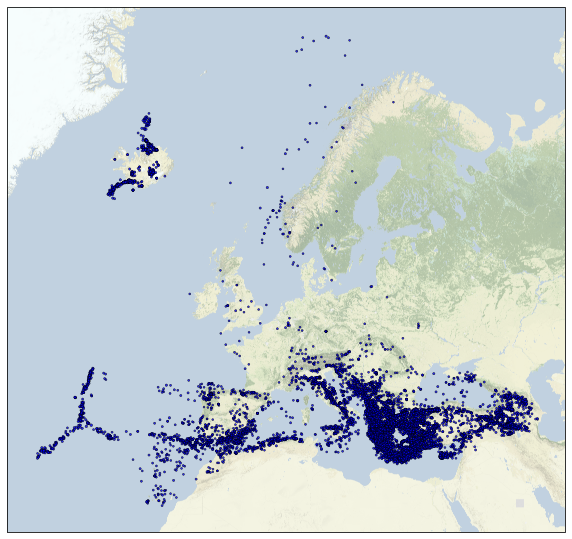

In [8]:
fig = plt.figure(figsize=(10, 10), linewidth=1)    
plot_in_space(cat, resolution='50m')

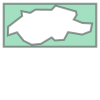

In [10]:
msk

In [ ]:
ax = plot_cum_count(df, mcs=np.arange(0.5, 4.0, 1), delta_m=0.1)

In [ ]:
ax = plot_mags_in_time(df)

In [ ]:
ax = plt.subplots(figsize=(8, 6))[1]

plot_cum_fmd(df['magnitude'], ax=ax, color='blue')
plot_fmd(df['magnitude'], ax=ax, color='red')

ax.legend(['cumulative', 'non cumulative'])

## 2. Generate and bin synthetic earthquakes
<font color=#208de2> First we need to define the number of earthquakes, the b-value and the completeness magnitude. For the b-value, note that beta is defined as the natural logarithm equivalent of the b-value. </font>

In [ ]:
from catalog_tools import simulate_magnitudes, bin_to_precision

In [ ]:
n = 200
b_value = 1
beta = b_value*np.log(10)
delta_m = 0.1
mc = 3
mc_generation = mc - delta_m / 2

<font color=#208de2> Now we can generate a synthetic magnitude distribution: </font>

In [ ]:
mags = simulate_magnitudes(n,beta,mc_generation)

<font color=#208de2> In order to bin the magnitudes, we just need to define the step-size: </font>

In [ ]:
mags_binned = bin_to_precision(mags, delta_m)

## 4. Calculate b-values
<font color=#208de2> We estimate the b-value from the binned sample. It is important to pass on the information of which binning (if any) is applied. Also, be cautious that beta is (as above) a factor of np.log(10) different to the b-value. </font>

In [ ]:
from catalog_tools import estimate_beta_elst, estimate_beta_utsu, estimate_beta_tinti, estimate_beta_laplace

# Other b-value estimation methods:
# from catalog_tools import estimate_beta_elst, estimate_beta_tinti, estimate_beta_laplace

In [ ]:
beta_estimate = estimate_beta_tinti(mags_binned, mc=mc, delta_m=delta_m)
# beta_estimate = estimate_beta_utsu(mags_binned,mc=mc, delta_m=delta_m)
# beta_estimate = estimate_beta_elst(mags_binned, delta_m=delta_m)
# beta_estimate = estimate_beta_laplace(mags_binned, delta_m=delta_m)

<font color=#208de2> We can plot the original and binned magnitudes and their respective b-value estimates now. Note that the data are offset by half the binning size so that the cumulative number is shown correctly. </font>

In [ ]:
ax = plt.subplots(figsize=(8, 6))[1]

plot_cum_fmd(mags, ax=ax, b_value=b_value, mc=mc - delta_m/2, color='blue')
plot_cum_fmd(mags_binned,ax=ax, b_value=beta_estimate/np.log(10), delta_m=delta_m, color='red')

ax.legend(['Magnitudes original', 'True b-value', 'Magnitudes binned', 'Fit Tinti'])